<a href="https://colab.research.google.com/github/saijaswanthgattidi/cs5590-Deeplearning/blob/master/icp2/MLICP2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**From uper Menu choose:**
---
Runtime --> Change runtime type:
---
change Hardare accelerator to (gpu)

In [19]:
%tensorflow_version 1.15
import tensorflow as tf
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [21]:
print(train_images.shape[1:])

(28, 28)


#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature

In [22]:
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


#convert data to float and scale values between 0 and 1

In [0]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')
train_datad = train_data.astype('float')
test_datad = test_data.astype('float')

#scale data

In [0]:
train_data /=255.0
test_data /=255.0

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()

In [0]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.2701 - acc: 0.9172 - val_loss: 0.1090 - val_acc: 0.9644
Epoch 2/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0912 - acc: 0.9716 - val_loss: 0.1025 - val_acc: 0.9692
Epoch 3/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0580 - acc: 0.9817 - val_loss: 0.0797 - val_acc: 0.9760
Epoch 4/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0403 - acc: 0.9867 - val_loss: 0.0914 - val_acc: 0.9738
Epoch 5/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0286 - acc: 0.9907 - val_loss: 0.0748 - val_acc: 0.9792
Epoch 6/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0230 - acc: 0.9923 - val_loss: 0.1001 - val_acc: 0.9734
Epoch 7/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0169 - acc: 0.9945 - val_loss: 0.0823 - val_acc

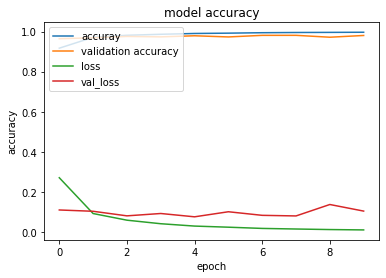

In [30]:

import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy','loss','val_loss'], loc='upper left')
plt.show()

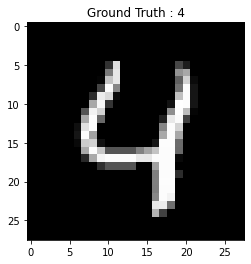

In [31]:
plt.imshow(test_images[4,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(test_labels[4]))
plt.show()

In [32]:

x=model.predict_classes(test_data[[4],:])
print("Predicted label",test_labels[x])

Predicted label [4]


In [33]:
m = Sequential()
m.add(Dense(512, activation='relu', input_shape=(dimData,)))
m.add(Dense(512, activation='relu'))
m.add(Dense(512, activation='tanh'))
m.add(Dense(512, activation='sigmoid'))
m.add(Dense(10, activation='softmax'))
m.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
m.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.3249 - acc: 0.8959 - val_loss: 0.2004 - val_acc: 0.9382
Epoch 2/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.1025 - acc: 0.9683 - val_loss: 0.1205 - val_acc: 0.9640
Epoch 3/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0645 - acc: 0.9802 - val_loss: 0.1082 - val_acc: 0.9692
Epoch 4/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0458 - acc: 0.9864 - val_loss: 0.1012 - val_acc: 0.9725
Epoch 5/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0348 - acc: 0.9892 - val_loss: 0.0791 - val_acc: 0.9799
Epoch 6/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0283 - acc: 0.9910 - val_loss: 0.1035 - val_acc: 0.9753
Epoch 7/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0228 - acc: 0.9928 - val_loss: 0.1142 - val_acc

In [34]:

p = Sequential()
p.add(Dense(512, activation='relu', input_shape=(dimData,)))
p.add(Dense(512, activation='relu'))
p.add(Dense(10, activation='softmax'))
p.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
p.fit(train_datad, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_datad, test_labels_one_hot)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 26us/step - loss: 14.4348 - acc: 0.1044 - val_loss: 14.4612 - val_acc: 0.1028
Epoch 2/10
60000/60000 [==============================] - 1s 18us/step - loss: 14.6007 - acc: 0.0941 - val_loss: 14.6804 - val_acc: 0.0892
Epoch 3/10
60000/60000 [==============================] - 1s 18us/step - loss: 14.6618 - acc: 0.0903 - val_loss: 14.6804 - val_acc: 0.0892
Epoch 4/10
60000/60000 [==============================] - 1s 18us/step - loss: 14.6618 - acc: 0.0904 - val_loss: 14.6804 - val_acc: 0.0892
Epoch 5/10
60000/60000 [==============================] - 1s 18us/step - loss: 14.6618 - acc: 0.0903 - val_loss: 14.6804 - val_acc: 0.0892
Epoch 6/10
60000/60000 [==============================] - 1s 19us/step - loss: 14.6618 - acc: 0.0903 - val_loss: 14.6804 - val_acc: 0.0892
Epoch 7/10
60000/60000 [==============================] - 1s 18us/step - loss: 14.6618 - acc: 0.0904 - val_loss: 14.

In [35]:
from keras.models import Model
from keras.layers import Input
i=Input(shape=(784,))
x= Dense(512, activation='relu')(i)
x= Dense(512, activation='relu')(x)

x= Dense(10, activation='softmax')(x)
p = Model(input=i,output=x)
p.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
p.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.2770 - acc: 0.9137 - val_loss: 0.1167 - val_acc: 0.9618
Epoch 2/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0932 - acc: 0.9713 - val_loss: 0.0932 - val_acc: 0.9714
Epoch 3/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0581 - acc: 0.9818 - val_loss: 0.0700 - val_acc: 0.9776
Epoch 4/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0416 - acc: 0.9867 - val_loss: 0.0685 - val_acc: 0.9795
Epoch 5/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0289 - acc: 0.9905 - val_loss: 0.0698 - val_acc: 0.9789
Epoch 6/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0221 - acc: 0.9928 - val_loss: 0.0786 - val_acc: 0.9780
Epoch 7/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0170 - acc: 0.9942 - val_loss: 0.0757 - val_acc